In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

DATA_FOLDER = "../DATA/"

In [2]:
train = pd.read_parquet(DATA_FOLDER + "RAW/train.parq").dropna().drop_duplicates()
train

,attack_time,watcher_country,watcher_as_num,watcher_as_name,attacker_country,attacker_as_num,attacker_as_name,attack_type,watcher_uuid_enum,attacker_ip_enum,label
0,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:exploit,0,6466,0
1,2023-07-31 07:17:51+00:00,DE,34011.0,Host Europe GmbH,TR,47721.0,Murat Aktas,http:spam,0,6466,0
2,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:bruteforce,2,4637,0
3,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:spam,2,4637,0
4,2023-07-31 07:17:49+00:00,DE,20886.0,bn:t Blatzheim Networks Telecom GmbH,DE,51167.0,Contabo GmbH,http:exploit,2,4637,0
...,...,...,...,...,...,...,...,...,...,...,...
61629671,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:bruteforce,9606,191439,0
61629673,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:scan,9606,191439,0
61629674,2023-08-24 21:14:59+00:00,US,22611.0,INMOTION,US,7018.0,ATT-INTERNET4,http:exploit,9606,191439,0
61629681,2023-08-24 21:14:46+00:00,US,22612.0,NAMECHEAP-NET,US,23033.0,WOW,http:scan,40383,193446,0


In [3]:
train_type_label = train[["attack_type","label"]]
train_type_label = train_type_label.groupby('attack_type')['label'].value_counts().unstack().fillna(0)
train_type_label.columns

C:\Users\Francisco\AppData\Local\Temp\ipykernel_5556\2488901267.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_type_label = train_type_label.groupby('attack_type')['label'].value_counts().unstack().fillna(0)


Index([0, 1], dtype='int8', name='label')

In [4]:
train_type_label

label,0,1
attack_type,,
database:bruteforce,453,0
ftp:bruteforce,953,0
http:bruteforce,4134226,55476
http:crawl,82840,3905
http:exploit,7007330,139971
http:scan,9137861,177258
http:spam,12622254,251403
pop3/imap:bruteforce,429021,10287
sip:bruteforce,224941,2


In [5]:
train_type_label.index.name = 'attack_type'

melted_df = train_type_label.reset_index().melt(id_vars='attack_type', var_name='label', value_name='value')
melted_df

,attack_type,label,value
0,database:bruteforce,0,453
1,ftp:bruteforce,0,953
2,http:bruteforce,0,4134226
3,http:crawl,0,82840
4,http:exploit,0,7007330
5,http:scan,0,9137861
6,http:spam,0,12622254
7,pop3/imap:bruteforce,0,429021
8,sip:bruteforce,0,224941
9,smb:bruteforce,0,12415


In [6]:
attacks = melted_df.groupby("attack_type")["value"].sum().reset_index()
attacks

C:\Users\Francisco\AppData\Local\Temp\ipykernel_5556\146430392.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  attacks = melted_df.groupby("attack_type")["value"].sum().reset_index()


,attack_type,value
0,database:bruteforce,453
1,ftp:bruteforce,953
2,http:bruteforce,4189702
3,http:crawl,86745
4,http:exploit,7147301
5,http:scan,9315119
6,http:spam,12873657
7,pop3/imap:bruteforce,439308
8,sip:bruteforce,224943
9,smb:bruteforce,12415


In [7]:
filtered = melted_df[melted_df["label"] ==1 ]
filtered

,attack_type,label,value
15,database:bruteforce,1,0
16,ftp:bruteforce,1,0
17,http:bruteforce,1,55476
18,http:crawl,1,3905
19,http:exploit,1,139971
20,http:scan,1,177258
21,http:spam,1,251403
22,pop3/imap:bruteforce,1,10287
23,sip:bruteforce,1,2
24,smb:bruteforce,1,0


In [8]:
result_inner = pd.merge(filtered, attacks, on='attack_type', how='inner')
result_inner["percentage"] = result_inner["value_x"]/result_inner["value_y"]*100
result_inner

,attack_type,label,value_x,value_y,percentage
0,database:bruteforce,1,0,453,0.000000
1,ftp:bruteforce,1,0,953,0.000000
2,http:bruteforce,1,55476,4189702,1.324104
3,http:crawl,1,3905,86745,4.501700
4,http:exploit,1,139971,7147301,1.958376
5,http:scan,1,177258,9315119,1.902906
6,http:spam,1,251403,12873657,1.952848
7,pop3/imap:bruteforce,1,10287,439308,2.341637
8,sip:bruteforce,1,2,224943,0.000889
9,smb:bruteforce,1,0,12415,0.000000


In [9]:
result_inner[['Protocol', 'Attack']] = result_inner['attack_type'].str.split(pat = ":", expand = True)
splitted = result_inner[["Protocol", "Attack", "percentage"]]
splitted

,Protocol,Attack,percentage
0,database,bruteforce,0.000000
1,ftp,bruteforce,0.000000
2,http,bruteforce,1.324104
3,http,crawl,4.501700
4,http,exploit,1.958376
5,http,scan,1.902906
6,http,spam,1.952848
7,pop3/imap,bruteforce,2.341637
8,sip,bruteforce,0.000889
9,smb,bruteforce,0.000000


In [10]:
max = splitted['percentage'].max().max()

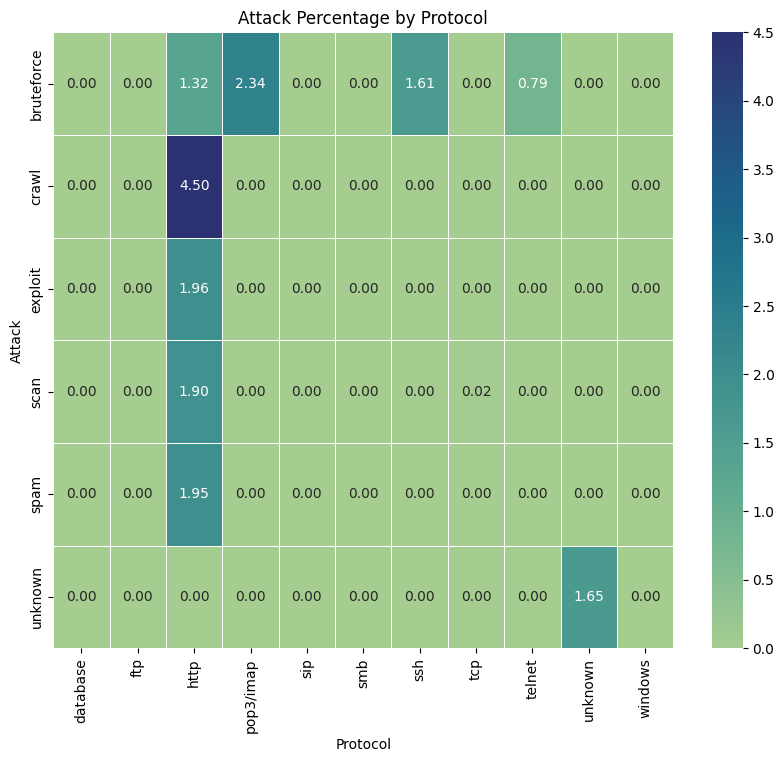

In [11]:
# Create a pivot table for the heatmap
heatmap_data = splitted.pivot_table(index='Attack', columns='Protocol', values='percentage', aggfunc='sum', fill_value=0)

# Create the heatmap with custom color map and color bar range
plt.figure(figsize=(10, 8))
cmap = sns.cm.crest  # Choose a custom color map (cyan-blue)

sns.heatmap(heatmap_data, annot=True, cmap=cmap, fmt=".2f", linewidths=.5, vmin=0, vmax=4.5)  # Set min and max values for the color bar
plt.title('Attack Percentage by Protocol')
plt.show()